In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical

from keras.datasets import cifar10

%config InlineBackend.figure_format='svg'
%matplotlib inline
plt.style.use('ggplot')

In [4]:
class_names = {
    0: 'Airplane',
    1: 'Automobile',
    2: 'Bird',
    3: 'Cat',
    4: 'Deer',
    5: 'Dog',
    6: 'Frog',
    7: 'Horse',
    8: 'Ship',
    9: 'Truck'
}
id_class = {v: k for k, v in class_names.items()}
num_classes = len(class_names)

In [35]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train / 255
x_test = x_test / 255

y_train = y_train.T[0]
y_test = y_test.T[0]

y_test_c = to_categorical(y_test)
y_train_c = to_categorical(y_train)

In [6]:
x_train_f = x_train.reshape((len(x_train), -1))
x_test_f = x_test.reshape((len(x_test), -1))

In [124]:
list(map(len, [x_train, y_train, x_test, y_test, x_train_f, x_test_f]))

[50000, 50000, 10000, 10000, 50000, 10000]

In [50]:
from sklearn.neighbors import KNeighborsClassifier
K = 10

id_part = np.random.randint(0, len(x_train), 10000)

knc = KNeighborsClassifier(n_neighbors=K)
knc = knc.fit(x_train_f[id_part], y_train[id_part])

In [51]:
y_pred_knc = knc.predict(x_test_f)
score = accuracy_score(y_test, y_pred_knc)

print(f"{K = }")
print(f"{score = }")

K = 10
score = 0.2967


In [9]:
id_part = np.random.randint(0, len(x_train), 2000)

svc = SVC()
svc = svc.fit(x_train_f[id_part], y_train[id_part])

In [10]:
y_pred_svc = svc.predict(x_test_f)
score = accuracy_score(y_test, y_pred_svc)

print(f"{score = }")

score = 0.4022


https://ermlab.com/en/blog/nlp/cifar-10-classification-using-keras-tutorial/

In [22]:
from keras.layers import Dense, Flatten
from keras import Sequential


model = Sequential([
    Flatten(),
    Dense(128, activation='relu'),
    Dense(512, activation='relu'),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])
model.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train_c, batch_size=32, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.2823 - loss: 1.9572
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3945 - loss: 1.6817
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4231 - loss: 1.6108
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4374 - loss: 1.5687
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4476 - loss: 1.5373
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4533 - loss: 1.5157
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4586 - loss: 1.4973
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4663 - loss: 1.4828
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4720 - loss: 1.4661
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4797 - loss: 1.4502


In [37]:
model.summary()

pred = model.predict(x_test)
y_pred_mlp = np.argmax(pred, axis=-1)

score = accuracy_score(y_test, y_pred_mlp)
print(f"{score = }")

pred = model.evaluate(x_test, y_test_c)
print(pred)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,478,625 (5.64 MB)

 Trainable params: 492,874 (1.88 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 985,751 (3.76 MB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
score = 0.4613
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4665 - loss: 1.4979
[1.5002974271774292, 0.46129998564720154]


In [27]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras import Sequential
from keras.utils import to_categorical

model1 = Sequential([
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(512, activation='relu'),
    # Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax'),
])

model1.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])

y_train_c = to_categorical(y_train)
model1.fit(x_train, y_train_c, batch_size=32, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.4091 - loss: 1.6067
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6127 - loss: 1.0996
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6663 - loss: 0.9477
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7062 - loss: 0.8480
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7330 - loss: 0.7603
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7654 - loss: 0.6787
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7829 - loss: 0.6114
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8085 - loss: 0.5418
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8313 - loss: 0.4818
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8583 - loss: 0.4086


In [36]:
model1.summary()

pred = model1.predict(x_test)
y_pred_cnn = np.argmax(pred, axis=-1)

score1 = accuracy_score(y_test, y_pred_cnn)
print(f"{score1 = }")

pred = model1.evaluate(x_test, y_test_c)
print(pred)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │       921,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,981,409 (11.37 MB)

 Trainable params: 993,802 (3.79 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,987,607 (7.58 MB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
score1 = 0.6328
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6290 - loss: 1.3284
[1.3486374616622925, 0.6327999830245972]


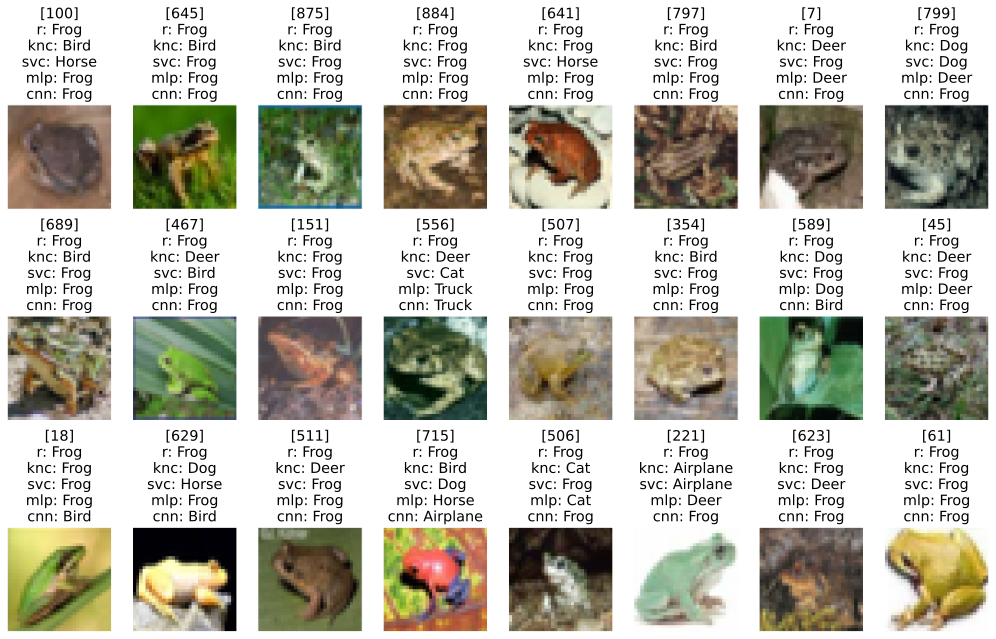

In [66]:
cols = 8
rows = 3
num = cols * rows

fig = plt.figure(figsize=(8,3))
for i in range(num):
    ax = fig.add_subplot(rows, cols, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_test[:]==id_class["Frog"])[0]
    features_idx = x_test[idx,::]
    y_real = y_test[idx]
    pred_knc = y_pred_knc[idx]
    pred_svc = y_pred_svc[idx]
    pred_mlp = y_pred_mlp[idx]
    pred_cnn = y_pred_cnn[idx]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num,::]
    ax.set_title(f"""[{img_num}]
r: {class_names[y_real[img_num]]}
knc: {class_names[pred_knc[img_num]]}
svc: {class_names[pred_svc[img_num]]}
mlp: {class_names[pred_mlp[img_num]]}
cnn: {class_names[pred_cnn[img_num]]}""")
    plt.imshow(im)


fig.set_size_inches(2.2 * cols, 3.6 * rows)
plt.autoscale()
plt.show()

In [41]:
model.save("mlp.keras")
model1.save("cnn.keras")

In [43]:
from keras.models import load_model

model = load_model("mlp.keras")
model1 = load_model("cnn.keras")